## Traveling Salesman Problem - Greedy + Simulated Annealing

### Import Packages

In [18]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from IPython.display import clear_output
import time
import copy

### Inputs

In [19]:
#Generate Data Inputs

# Select random seed
random.seed(1)

# Number of cities
n=100

#Coordinate Range
rangelct=10000

#No. of swaps at each iteration
no_swap=1

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

#Compute distance between locations
distancelct=np.empty([n, n])
for i_index in range(n):
    for j_index in range(n):
        distancelct[i_index,j_index]=(math.sqrt(((coordlct_x[i_index]-coordlct_x[j_index])**2) +((coordlct_y[i_index]-coordlct_y[j_index])**2)))    

distancelct[np.diag_indices_from(distancelct)] = 99999

df = pd.DataFrame(distancelct)
df.index += 1
df.columns += 1
cij_model=df.stack().to_dict()


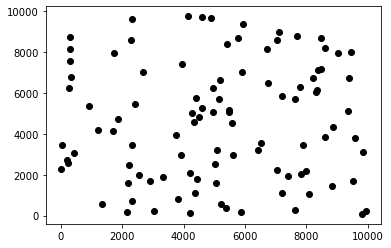

In [20]:
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

### Solution Representation and Initial Solution

In [21]:
random.seed(1)
linkindex_p1 = np.empty((0, 0))
linkindex_p2 = np.empty((0, 0))

while np.min(distancelct)!=99999:
    nextmin=np.where(distancelct==np.min(distancelct))
    p2_value=0
    if len(nextmin[0])>1:
        p1=nextmin[0][0]
        p2=nextmin[1][0]
    else:
        p1=nextmin[0]
        p2=nextmin[1]
    pcycle=np.copy(p2)
    while np.where(pcycle==linkindex_p1)[0].size==1:
        pcycle_index=np.where(pcycle==linkindex_p1)[0]
        pcycle=linkindex_p2[np.where(pcycle==linkindex_p1)[0]]
    if pcycle== p1:
        distancelct[p1,p2]=99999
    else:
        distancelct[p1,:]=99999
        distancelct[:,p2]=99999
        distancelct[p2,p1]=99999
        linkindex_p1=np.append(linkindex_p1, p1)
        linkindex_p2=np.append(linkindex_p2, p2)
        linkindex_p1=linkindex_p1.astype(int)
        linkindex_p2=linkindex_p2.astype(int)
        


In [22]:
lastpvalue=0
i_index=0
while lastpvalue==0:
    if np.where(linkindex_p1==i_index)[0].size==0:
        lastpvalue=i_index
    i_index=i_index+1
    
p1=lastpvalue

lastpvalue=0
i_index=0
while lastpvalue==0:
    if np.where(linkindex_p2==i_index)[0].size==0:
        lastpvalue=i_index
    i_index=i_index+1

p2=lastpvalue

linkindex_p1=np.append(linkindex_p1, p1)
linkindex_p2=np.append(linkindex_p2, p2)
linkindex_p1=linkindex_p1.astype(int)
linkindex_p2=linkindex_p2.astype(int)

In [23]:
node_i=0
Solution_i=np.copy(node_i)
for i_index in range(n-1):
    node_i=linkindex_p2[np.where(linkindex_p1==node_i)[0]]
    Solution_i=np.append(Solution_i, node_i)

In [24]:
#Re-compute distance between locations
distancelct=np.empty([n, n])
for i_index in range(n):
    for j_index in range(n):
        distancelct[i_index,j_index]=(math.sqrt(((coordlct_x[i_index]-coordlct_x[j_index])**2) +((coordlct_y[i_index]-coordlct_y[j_index])**2)))    

distancelct[np.diag_indices_from(distancelct)] = 99999

#Compute Objective Value
ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
ObjValue

107445.9063806698

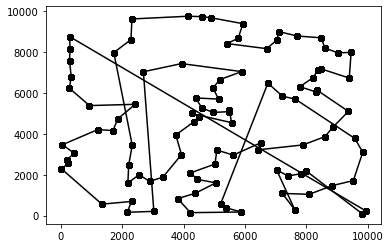

In [25]:
def connectpoints(x,y,p1,p2):
        x1, x2 = x[p1], x[p2]
        y1, y2 = y[p1], y[p2]
        plt.plot([x1,x2],[y1,y2],'k-')

for i_index in range(len(linkindex_p2)): 
    connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])

    plt.plot(coordlct_x, coordlct_y, 'o', color='black');

In [26]:
#Exchange Operator
def swap_random(seq):
    idx = range(len(seq))
    i1, i2 = random.sample(idx, 2)
    seq[i1], seq[i2] = seq[i2], seq[i1]

In [27]:
#Insert Operator
def insert_random(seq):
    idx = range(len(seq))
    i1=random.sample(idx, 1)
    remove_index=np.where(np.array(seq)==i1)
    seq.pop(int(remove_index[0]))
    seq.insert(random.sample(idx, 1)[0], i1[0])
    

In [28]:
#3-Opt
def k_opt(seq):
    global Solution_i
    idx = range(len(seq))
    i1=np.sort(random.sample(idx, 2))

    #Split in 3 
    Opt1=seq[0:i1[0]]
    Opt2=seq[(i1[0]):i1[1]]
    Opt3=seq[(i1[1]):len(seq)]
    Opt2rev=Opt2[::-1]
    Opt3rev=Opt3[::-1]

    #3-Opt Solutions
    Sol1=Opt1+Opt2rev+Opt3rev
    Sol2=Opt1+Opt3+Opt2
    Sol3=Opt1+Opt3+Opt2rev
    Sol4=Opt1+Opt3rev+Opt2

    #2 Opt Solution
    Sol5=Opt1+Opt2rev+Opt3
    Sol6=Opt1+Opt2+Opt3rev
    Sol7=Opt1+Opt3rev+Opt2rev

    OptNeigh=[Sol1,Sol2,Sol3,Sol4,Sol5,Sol6,Sol7]

    ObjValue_Neigh=list();
    #Compute Obj Value of All Solutions
    for i_index in range(len(OptNeigh)):
        Solution_Neigh=OptNeigh[i_index]

        dfSolution_i=pd.DataFrame(Solution_Neigh)
        dflinkindex_p1=dfSolution_i
        dflinkindex_p2=dfSolution_i.shift(-1)
        dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
        linkindex_p1=dflinkindex_p1.to_numpy()
        linkindex_p2=dflinkindex_p2.to_numpy()
        linkindex_p1=linkindex_p1.astype(int)
        linkindex_p2=linkindex_p2.astype(int)
        linkindex_p1=linkindex_p1.transpose()[0]
        linkindex_p2=linkindex_p2.transpose()[0]

        #Compute Objective Value
        ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
        ObjValue_Neigh=np.append(ObjValue_Neigh,ObjValue)
        OptNeigh[np.argmin(ObjValue_Neigh)]
        Solution_i=OptNeigh[np.argmin(ObjValue_Neigh)]


In [29]:
Solution_i=list(Solution_i)

### Simulated Annealing Algorithm

In [30]:
random.seed(3)
iteration=0
ObjValueOpt=ObjValue
Objvalue_list=ObjValue
program_starts = time.time()
cputime_i=[0,0]
OptSolution=Solution_i
temp=100
#temp=1000
it_T=0

tp = temp
while cputime_i[-1]<150:

    iteration=iteration+1
    Solution_i=copy.deepcopy(OptSolution)
    
    swap_it=0
    
    while swap_it<no_swap:
        if random.random()<0.5:
            k_opt(Solution_i)
        else:
            insert_random(Solution_i)
        swap_it=swap_it+1
        
    dfSolution_i=pd.DataFrame(Solution_i)
    dfSolution_i
    dflinkindex_p1=dfSolution_i
    dflinkindex_p2=dfSolution_i.shift(-1)
    dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
    linkindex_p1=dflinkindex_p1.to_numpy()
    linkindex_p2=dflinkindex_p2.to_numpy()
    linkindex_p1=linkindex_p1.astype(int)
    linkindex_p2=linkindex_p2.astype(int)
    linkindex_p1=linkindex_p1.transpose()[0]
    linkindex_p2=linkindex_p2.transpose()[0]
    
    #Compute Objective Value
    ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
    
    #Compute Acceptance Rate
    diff = ObjValue-ObjValueOpt
    
    #Calculate temperature for current iteration
    if it_T>20:
        tp = temp / float(iteration + 1)
        it_T=0
    #tp = tp *0.9999
    #tp= temp / np.log(iteration + 1)
    #print(tp)
    
    it_T=it_T+1
    
    #Calculate metropolis acceptance criterion
    metropolis = np.exp(-diff / tp)
    
    #Update Optimal Solution
    if diff < 0 or random.random() < metropolis:
        ObjValueOpt=copy.deepcopy(ObjValue)
        OptSolution=copy.deepcopy(Solution_i)
        
        Objvalue_list=np.append(Objvalue_list, ObjValueOpt)
        now = time.time()
        cputime_i=np.append(cputime_i, now-program_starts)
    
    print(ObjValueOpt)
            
#Update last objective value
Objvalue_list=np.append(Objvalue_list, min(Objvalue_list))
now = time.time()
cputime_i=np.append(cputime_i, now-program_starts)

107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.9063806698
107445.90638066978
107445.90638066978
107445.90638066978
107445.90638066978
107445.90638066978
107445.90638066978
107445.90638066978
107445.90638066978
107445.90638066978
107445.90638066978
107445.90638066978
107445.90638066978
107445.90638066978
107121.98504555179
107121.98504555179
107121.98504555179
106984.87188253089
106984.87188253089
105510.39539481225
105510.39539481225
105510.39539481225
105510.39539481225
105510.39539481225
105510.39539481225
105510.39539481225
105510.39539481225
105510.39539481225
105510.39539481225
105510.39539481225

<ipython-input-30-47f870b3d745>:56: RuntimeWarning: overflow encountered in exp
  metropolis = np.exp(-diff / tp)



100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
100480.75230303456
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693.51392504224
99693

96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.05679365408
96128.0567

95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95991.04270804995
95675.41921973275
95675.41921973275
95675.41921973275
95675.41921973275
95675.4192

94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.34487628931
94598.3448

92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.04211449953
92339.0421

89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498077
89444.80824498074
89444.80824498074
89444.80824498074
89444.80824498074
89444.80824498074
89444.80824498074
89444.80824498074
89444.80824498074
89444.80824498074
89444.80824498074
89444.8082

89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753819
89267.52778753817
89267.52778753817
89267.52778753817
89267.52778753817
89267.52778753817
89267.52778753817
89267.52778753817
89267.52778753817
89267.52778753817
89267.52778753817
89267.52778753817
89267.52778753817
89267.52778753817
89267.52778753817
89267.52778753817
89267.5277

88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113722
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.6840

88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113724
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88492.68407113725
88434.77092913893
88434.77092913893
88434.77092913893
88434.77092913893
88434.77092913893
88434.77092913893
88434.77092913893
88434.77092913893
88434.77092913893
88434.77092913893
88434.77092913893
88434.77092913893
88434.77092913893
88434.77092913893
88434.77092913893
88434.7709

87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.1924

87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.1924

87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.1924

87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.19244898057
87638.1924

87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898058
87638.19244898057
87638.19244898057
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514369
87437.34718514372
87437.34718514372
87437.3471

87214.57658881349
87214.57658881349
87214.57658881349
87214.57658881349
87214.57658881349
87214.57658881349
87214.57658881349
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.57658881346
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888135
87214.5765888

87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.57658881348
87214.5765

86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.20585482845
86256.2058

86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482844
86256.20585482844
86256.20585482844
86256.2058

86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482847
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.20585482844
86256.2058

84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.4724608496
84616.4724608496
84616.4724608496
84616.4724608496
84616.4724608496
84616.4724608496
84616.4724608496
84616.4724608496
84616.4724608496
84616.4724608496
84616.4724608496
84616.4724608496
8461

84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084957
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.47246084962
84616.4724

84410.38506804025
84410.38506804025
84410.38506804025
84410.38506804025
84410.38506804025
84410.38506804025
84410.38506804025
84410.38506804025
84410.38506804025
84410.38506804025
84410.38506804025
84410.38506804025
84410.38506804025
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.38506804027
84410.3850

84410.38506804025
84410.38506804025
84410.38506804025
84410.38506804025
84410.38506804025
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804024
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.38506804028
84410.3850

83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.5517

83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991865
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83817.55173991862
83556.28829405109
83556.28829405109
83556.28829405109
83556.28829405109
83556.28829405109
83556.28829405109
83556.28829405109
83556.28829405109
83556.28829405109
83556.28829405109
83556.28829405109
83537.6481270678
83537.64812

83537.64812706776
83537.64812706776
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706782
83537.64812706776
83537.64812706776
83537.64812706776
83537.64812706776
83537.64812706776
83537.64812706776
83537.64812706776
83537.64812706776
83537.64812706776
83537.6481

83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.64812706779
83537.6481

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.77662695754
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766269575

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.77662695

83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
831

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.77662695762
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695754
83106.77662695754
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.77662695

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695754
83106.77662695754
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.7766

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.7766

83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695754
83106.77662695754
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
8310

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766

83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.7766

83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695758
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766

83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695755
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.7766

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.776626

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758


83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.77662695

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695755
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.77662695

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766269576
83106.7766269576
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.776626

83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695757
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695755
83106.77662695755
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695761
83106.77662695758
83106.77662695758
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.776626957

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695757
83106.77662695757
83106.7766

83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766

83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766

83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.77662695758
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.7766269576
83106.776626

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695752
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.7766

83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.77662695755
83106.7766

83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695754
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.77662695757
83106.7766

### Read output variables

In [31]:
min(Objvalue_list)

83106.77662695752

### Plot results

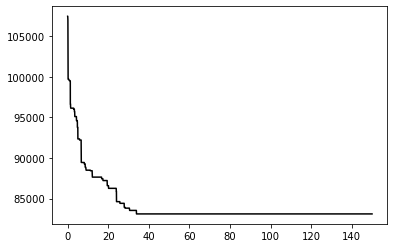

In [32]:
plt.plot(cputime_i[range(len(Objvalue_list))],Objvalue_list,'k-')

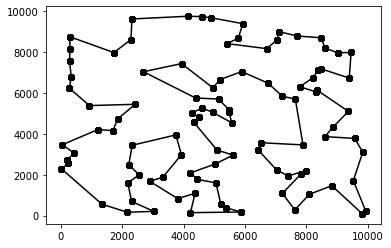

In [33]:
dfSolution_i=pd.DataFrame(OptSolution)

dflinkindex_p1=dfSolution_i
dflinkindex_p2=dfSolution_i.shift(-1)
dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
linkindex_p1=dflinkindex_p1.to_numpy()
linkindex_p2=dflinkindex_p2.to_numpy()
linkindex_p1=linkindex_p1.astype(int)
linkindex_p2=linkindex_p2.astype(int)
linkindex_p1=linkindex_p1.transpose()[0]
linkindex_p2=linkindex_p2.transpose()[0]

def connectpoints(x,y,p1,p2):
        x1, x2 = x[p1], x[p2]
        y1, y2 = y[p1], y[p2]
        plt.plot([x1,x2],[y1,y2],'k-')

for i_index in range(len(linkindex_p2)): 
    connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])

    plt.plot(coordlct_x, coordlct_y, 'o', color='black');


In [29]:
#solutiondf=pd.DataFrame(cputime_i[range(len(Objvalue_list))],Objvalue_list)

#solutiondf.to_csv('SolDf_SA_Kopt_Ins.csv',index=True)